In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

plt.style.use(r"C:\Users\B30724\Documents\Python\presentation.mplstyle")

class FuncGradCache:
    '''Create a wrapper class that:
    - Caches the most recent function and gradient values.
    - Updates the cache every time the optimizer calls the function and gradient.
    - The callback can then access the cached values without recomputation.
    '''
    def __init__(self, func, grad):
        self.func = func
        self.grad = grad
        self.last_x = None
        self.last_f = None
        self.last_g = None

    def fun(self, x):
        self.last_x = np.copy(x)
        self.last_f = self.func(x)
        # print('function evaluation', self.last_f)
        return self.last_f

    def jac(self, x):
        self.last_x = np.copy(x)
        self.last_g = self.grad(x)
        # print('gradient evaluation', self.last_g)
        return self.last_g

In [44]:
def plot_history(x0, x_hist, f_hist, g_hist):

    traj = np.vstack([x0] + x_hist)
    x = np.linspace(-1,2,101)
    y = np.linspace(-1,2,101)
    xx, yy = np.meshgrid(x, y)
    func = lambda X, Y: 1 - np.exp(-((X-1)**2 + (X-1)*(Y-1) + 0.5*(Y-1)**2))

    fig, axs = plt.subplots(1,3, figsize=(9,3))
    axs[0].contourf(xx, yy, func(xx, yy), levels=12)
    axs[0].plot(traj[:,0], traj[:,1], marker='.', c='k', lw=1)
    axs[0].set(xlabel="X", ylabel="Y")
    axs[0].set(xlim=[-1,2], ylim=[-1,2])
    axs[0].set_aspect('equal')
    axs[1].plot(range(1,len(f_hist)+1), f_hist)
    axs[1].set(xlabel="Iteration", ylabel="Objective")
    axs[2].plot(range(1,len(g_hist)+1), [np.linalg.norm(g, ord=2) for g in g_hist])
    axs[2].set(xlabel="Iteration", ylabel="Gradient")
    fig.tight_layout()

def objective(x):
    return 1 - np.exp(-((x[0]-1)**2 + (x[0]-1)*(x[1]-1) + 0.5*(x[1]-1)**2))

def derivative(x):
    dfdx = (2*(x[0]-1) + x[1]-1) * np.exp(-((x[0]-1)**2 + (x[0]-1)*(x[1]-1) + 0.5*(x[1]-1)**2))
    dfdy = (x[0]-1 + x[1]-1) * np.exp(-((x[0]-1)**2 + (x[0]-1)*(x[1]-1) + 0.5*(x[1]-1)**2))
    return np.array([dfdx, dfdy])

In [16]:
x0 = np.array([-0.5, -0.5])
x_hist = []
f_hist = []
g_hist = []
cache = FuncGradCache(objective, derivative)
# For most scipy.optimize.minimize methods, the callback function only receives the current parameter vector xk
# The optimizer does not pass the current function value or gradient to the callback
# Workarounds: use a wrapper to cache values
def store(xk):
    x_hist.append(np.copy(xk))
    f_hist.append(cache.last_f.item())  # Only one value
    g_hist.append(cache.last_g)

res = minimize(cache.fun, x0, method='BFGS', jac=cache.jac, callback=store,
               tol=1e-6, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 20
         Gradient evaluations: 20


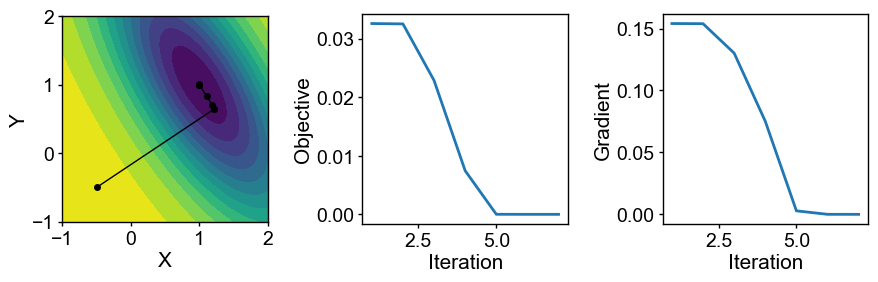

In [21]:
plot_history(x0, x_hist, f_hist, g_hist)

In [24]:
x0 = np.array([-0.5, -0.5])
x_hist = []
f_hist = []
g_hist = []
cache = FuncGradCache(objective, derivative)

def store(xk):
    x_hist.append(np.copy(xk))
    f_hist.append(cache.last_f.item())  # Only one value
    g_hist.append(cache.last_g)
# Newton Conjugate-Gradient
res = minimize(cache.fun, x0, method='Newton-CG', jac=cache.jac, callback=store,
               tol=1e-6, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 10
         Gradient evaluations: 19
         Hessian evaluations: 0


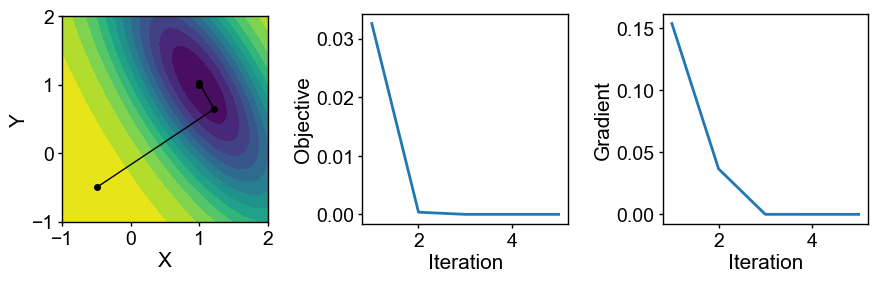

In [25]:
plot_history(x0, x_hist, f_hist, g_hist)

In [ ]:
x0 = np.array([-0.5, -0.5])
x_hist = []
f_hist = []
g_hist = []
cache = FuncGradCache(objective, derivative)

def store(xk):
    x_hist.append(np.copy(xk))
    f_hist.append(cache.last_f.item())  # Only one value
    g_hist.append(cache.last_g)
# Truncated Newton algorithm (a variation of Newton-CG method)
res = minimize(cache.fun, x0, method='TNC', jac=cache.jac, callback=store,
               tol=1e-6, options={'disp': True})

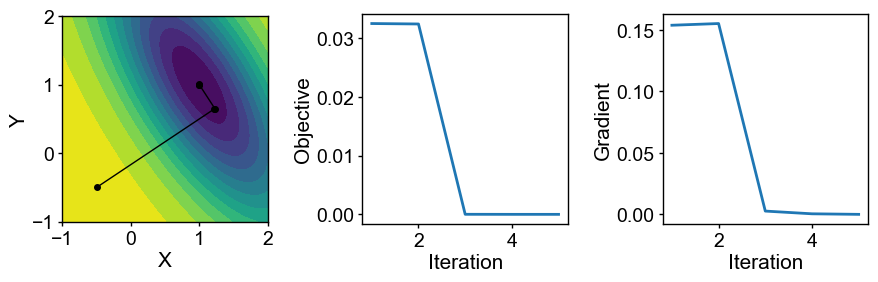

In [33]:
plot_history(x0, x_hist, f_hist, g_hist)

In [36]:
x0 = np.array([-0.5, -0.5])
x_hist = []
f_hist = []
g_hist = []
cache = FuncGradCache(objective, derivative)

def store(xk):
    x_hist.append(np.copy(xk))
    f_hist.append(cache.last_f.item())  # Only one value
    g_hist.append(cache.last_g)
# Sequential Least Squares Programming
res = minimize(cache.fun, x0, method='SLSQP', jac=cache.jac, callback=store,
               tol=1e-6, options={'disp': True})

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.5891423732483645e-09
            Iterations: 9
            Function evaluations: 16
            Gradient evaluations: 9


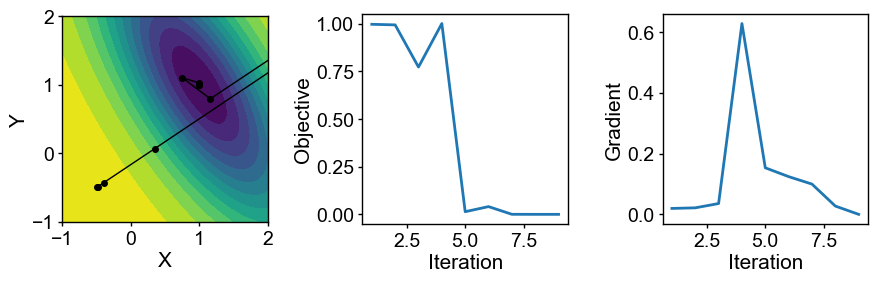

In [45]:
plot_history(x0, x_hist, f_hist, g_hist)